In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

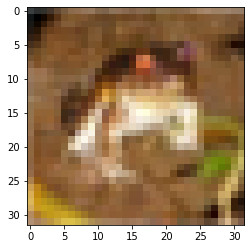

In [7]:
plt.imshow(x_train[0])

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
y_train=y_train.reshape(-1,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
def classnames(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

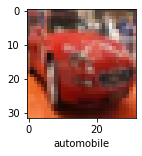

In [14]:
classnames(x_train,y_train,5)

In [15]:
#when you have value you use cross categorical crossentropy
#and when you have image classification you use categorical crossentropy

In [16]:
x_train=x_train/255
x_test=x_test/255

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8565 - accuracy: 0.3374
Epoch 2/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6582 - accuracy: 0.4140
Epoch 3/5
1563/1563 [==============================] - 168s 108ms/step - loss: 1.5713 - accuracy: 0.4447
Epoch 4/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.5099 - accuracy: 0.4657
Epoch 5/5
1563/1563 [==============================] - 161s 103ms/step - loss: 1.4557 - accuracy: 0.4858


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.49      0.50      1000
           1       0.46      0.71      0.56      1000
           2       0.37      0.31      0.34      1000
           3       0.39      0.28      0.32      1000
           4       0.48      0.35      0.41      1000
           5       0.52      0.25      0.33      1000
           6       0.50      0.58      0.53      1000
           7       0.67      0.41      0.51      1000
           8       0.43      0.77      0.55      1000
           9       0.45      0.52      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [26]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4675 - accuracy: 0.4746
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1271 - accuracy: 0.60660s - los
Epoch 3/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0062 - accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9261 - accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8650 - accuracy: 0.7003
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8125 - accuracy: 0.7159
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7678 - accuracy: 0.7330
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7270 - accuracy: 0.7459
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6981 - accuracy: 0.7555
Epoch 10/10
1563/1563 [==============================] -

In [30]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9086 - accuracy: 0.6941


[0.9086248874664307, 0.694100022315979]

In [33]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

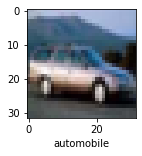

In [34]:
classnames(x_train,y_train,4)

In [35]:
y_pred=cnn.predict(x_test)

In [36]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

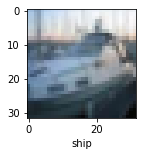

In [42]:
classnames(x_test,y_test,2)

In [41]:
classes[y_classes[2]]

'ship'

In [43]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.77      0.83      0.80      1000
           2       0.58      0.61      0.60      1000
           3       0.49      0.52      0.50      1000
           4       0.69      0.57      0.63      1000
           5       0.67      0.52      0.58      1000
           6       0.70      0.83      0.76      1000
           7       0.76      0.75      0.75      1000
           8       0.81      0.79      0.80      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

